**Seeding for reproducibility**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing the dependencies**

In [21]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

**Data Curation**

Upload the kaggle.json file

In [5]:
print(os.listdir("D:\project"))


print(len(os.listdir("D:\project\dataset")))
print(os.listdir("D:\project\dataset")[:32])


['code', 'dataset', 'model_VGG16.h5', 'VGG_CPD_class_indices.csv', 'VGG_CPD_class_indices.json']
32
['Cauliflower___Bacterial_spot_rot', 'Cauliflower___Black_Rot', 'Cauliflower___Downy_Mildew', 'Cauliflower___Healthy', 'Corn___Blight', 'Corn___Common_Rust', 'Corn___Gray_Leaf_Spot', 'Corn___Healthy', 'Potato___Bacterial_Wilt', 'Potato___Blight', 'Potato___Healthy', 'Rice___Bacterial_Leaf_Blight', 'Rice___Brown_Spot', 'Rice___Healthy', 'Rice___Hispa', 'Rice___Leaf_Blast', 'Rice___Leaf_scald', 'Rice___Sheath_Blight', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Wheat___Healthy', 'Wheat___Mildew', 'Wheat___Rust', 'Wheat___Septorial']


**Number of Classes = 32**

In [6]:

print(len(os.listdir("D:\project\dataset/Cauliflower___Healthy")))
print(os.listdir("D:\project\dataset/Cauliflower___Healthy")[:5])

1595
['Disease Free. (1).jpg', 'Disease Free. (10).jpg', 'Disease Free. (1000).jpg', 'Disease Free. (1001).jpg', 'Disease Free. (1005).jpg']


**Data Preprocessing**

In [7]:
# Dataset Path
base_dir = 'D:\project\dataset'

(256, 256, 3)


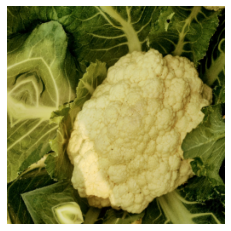

In [8]:

image_path = 'D:\project\dataset/Cauliflower___Healthy/Disease Free. (1).jpg'

# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [9]:
image_path = 'D:\project\dataset/Cauliflower___Healthy/Disease Free. (1).jpg'

# Read the image
img = mpimg.imread(image_path)

print(img)

[[[0.1254902  0.16470589 0.01568628]
  [0.14509805 0.18039216 0.01176471]
  [0.15294118 0.1882353  0.00392157]
  ...
  [0.69803923 0.64705884 0.3372549 ]
  [0.67058825 0.6039216  0.28627452]
  [0.6666667  0.59607846 0.29803923]]

 [[0.14509805 0.18431373 0.00784314]
  [0.1764706  0.21568628 0.01960784]
  [0.16862746 0.20784314 0.01960784]
  ...
  [0.627451   0.57254905 0.25882354]
  [0.5647059  0.49019608 0.18431373]
  [0.5294118  0.45882353 0.1764706 ]]

 [[0.25490198 0.28627452 0.05882353]
  [0.1882353  0.22745098 0.02352941]
  [0.14509805 0.18039216 0.00392157]
  ...
  [0.40784314 0.34117648 0.08235294]
  [0.32941177 0.28235295 0.05098039]
  [0.19215687 0.17254902 0.01568628]]

 ...

 [[0.7607843  0.72156864 0.31764707]
  [0.7176471  0.6784314  0.27058825]
  [0.7176471  0.67058825 0.29803923]
  ...
  [0.10980392 0.17254902 0.01960784]
  [0.10588235 0.16862746 0.02352941]
  [0.1254902  0.18431373 0.02745098]]

 [[0.7921569  0.7529412  0.36862746]
  [0.74509805 0.69411767 0.2901961 ]


In [10]:
# Image Parameters
img_size = 224
batch_size = 32

**Train Test Split**

In [11]:
# Image Data Generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
)

In [12]:
# Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 27623 images belonging to 32 classes.


In [13]:
# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 6890 images belonging to 32 classes.


**Convolutional Neural Network**

In [14]:
# Model Definition
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))


model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

In [15]:
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 256)               4

In [16]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**Model training**

In [17]:
# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
    epochs=5,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size  # Validation steps
)

Epoch 1/5


863/863 [==============================] - 2011s 2s/step - loss: 1.9670 - accuracy: 0.4409 - val_loss: 1.7563 - val_accuracy: 0.4965
Epoch 2/5
863/863 [==============================] - 1816s 2s/step - loss: 0.6570 - accuracy: 0.7921 - val_loss: 1.9123 - val_accuracy: 0.5465
Epoch 3/5
863/863 [==============================] - 1720s 2s/step - loss: 0.2220 - accuracy: 0.9205 - val_loss: 2.0400 - val_accuracy: 0.5943
Epoch 4/5
863/863 [==============================] - 1662s 2s/step - loss: 0.1343 - accuracy: 0.9453 - val_loss: 2.3900 - val_accuracy: 0.6077
Epoch 5/5
863/863 [==============================] - 1327s 2s/step - loss: 0.1170 - accuracy: 0.9495 - val_loss: 2.8391 - val_accuracy: 0.5799


**Model Evaluation**

In [ ]:
model.save('D:\project\code/CPD_model.h5')

In [22]:
# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
215/215 [==============================] - 238s 1s/step - loss: 2.8398 - accuracy: 0.5797
Validation Accuracy: 57.97%


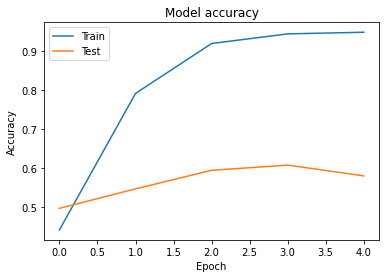

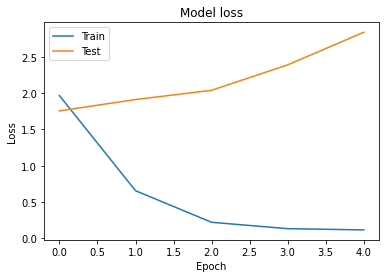

In [23]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

**Building a Predictive System**

In [24]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # print(img.shape)
    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Turn off axis numbers
    plt.show()
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [25]:
# # Create a mapping from class indices to class names
# class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [26]:
from tensorflow.keras.utils import to_categorical

class_indices = {v: k for k, v in train_generator.class_indices.items()}

# Get the number of classes
num_classes = len(class_indices)

# Perform one-hot encoding for each class index
one_hot_encoded_labels = {class_index: to_categorical(class_index, num_classes=num_classes) for class_index in class_indices}

# Display the one-hot encoded labels
for class_index, one_hot_label in one_hot_encoded_labels.items():
    print(f"Class Index: {class_index}, One-Hot Encoded Label: {one_hot_label}")


Class Index: 0, One-Hot Encoded Label: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
Class Index: 1, One-Hot Encoded Label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
Class Index: 2, One-Hot Encoded Label: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
Class Index: 3, One-Hot Encoded Label: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
Class Index: 4, One-Hot Encoded Label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
Class Index: 5, One-Hot Encoded Label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
Class Index: 6, One-Hot Encoded Label: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
Class Index: 7, One-Hot Encoded La

In [27]:
class_indices

{0: 'Cauliflower___Bacterial_spot_rot',
 1: 'Cauliflower___Black_Rot',
 2: 'Cauliflower___Downy_Mildew',
 3: 'Cauliflower___Healthy',
 4: 'Corn___Blight',
 5: 'Corn___Common_Rust',
 6: 'Corn___Gray_Leaf_Spot',
 7: 'Corn___Healthy',
 8: 'Potato___Bacterial_Wilt',
 9: 'Potato___Blight',
 10: 'Potato___Healthy',
 11: 'Rice___Bacterial_Leaf_Blight',
 12: 'Rice___Brown_Spot',
 13: 'Rice___Healthy',
 14: 'Rice___Hispa',
 15: 'Rice___Leaf_Blast',
 16: 'Rice___Leaf_scald',
 17: 'Rice___Sheath_Blight',
 18: 'Tomato___Bacterial_spot',
 19: 'Tomato___Early_blight',
 20: 'Tomato___Late_blight',
 21: 'Tomato___Leaf_Mold',
 22: 'Tomato___Septoria_leaf_spot',
 23: 'Tomato___Spider_mites Two-spotted_spider_mite',
 24: 'Tomato___Target_Spot',
 25: 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 26: 'Tomato___Tomato_mosaic_virus',
 27: 'Tomato___healthy',
 28: 'Wheat___Healthy',
 29: 'Wheat___Mildew',
 30: 'Wheat___Rust',
 31: 'Wheat___Septorial'}

In [28]:
# saving the class names as json file
json.dump(class_indices, open('D:\project\code/CPD_class_indices.json', 'w'))

In [29]:
import csv

# Assuming you have a 'class_indices' dictionary

# Specify the file path for the CSV file
csv_file_path = 'D:\project\code/CPD_class_indices.csv'

# Save class indices as a CSV file
with open(csv_file_path, 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(['ClassIndex', 'ClassName'])  # Write header

    for class_index, class_name in class_indices.items():
        csv_writer.writerow([class_index, class_name])


In [30]:
import json
from tensorflow.keras.utils import to_categorical

# Load class indices from the JSON file
with open('D:\project\code/CPD_class_indices.json', 'r') as json_file:
    loaded_class_indices = json.load(json_file)

# Get the number of classes
num_classes = len(loaded_class_indices)

# Convert class indices to integers (if needed)
loaded_class_indices_int = {int(k): v for k, v in loaded_class_indices.items()}

# Perform one-hot encoding for each loaded class index
one_hot_encoded_labels = {class_index: to_categorical(class_index, num_classes=num_classes) for class_index in loaded_class_indices_int}

# Display the one-hot encoded labels
for class_index, one_hot_label in one_hot_encoded_labels.items():
    print(f"Class Index: {class_index}, One-Hot Encoded Label: {one_hot_label.tolist()}")


Class Index: 0, One-Hot Encoded Label: [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Class Index: 1, One-Hot Encoded Label: [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Class Index: 2, One-Hot Encoded Label: [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Class Index: 3, One-Hot Encoded Label: [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Class Index: 4, One-Hot Encoded Label: [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


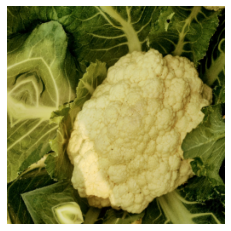

1/1 [==============================] - 1s 1s/step
Predicted Class Name: Cauliflower___Healthy


In [31]:
# Example Usage
image_path = 'D:\project\dataset/Cauliflower___Healthy/Disease Free. (1).jpg'
# image_path = '/content/drive/MyDrive/Project/Demo Dataset/Corn___healthy/image (1).jpg'
# image_path = '/content/drive/MyDrive/Project/Demo Dataset/Corn___Northern_Leaf_Blight/image (1).JPG'
predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)

**Save the model to Google drive or local**

In [ ]:
# model.save('drive/MyDrive/Youtube/trained_models/plant_disease_prediction_model.h5')

In [ ]:
# model.save('plant_disease_prediction_model.h5')

**Prediction Testing**

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('/content/drive/MyDrive/Project/Code/CPD_model.h5')



In [ ]:
import json
from tensorflow.keras.utils import to_categorical

# Load class indices from the JSON file
with open('/content/drive/MyDrive/Project/Code/CPD_class_indices.json', 'r') as json_file:
    loaded_class_indices = json.load(json_file)

# Get the number of classes
num_classes = len(loaded_class_indices)

# Convert class indices to integers (if needed)
loaded_class_indices_int = {int(k): v for k, v in loaded_class_indices.items()}

# Perform one-hot encoding for each loaded class index
one_hot_encoded_labels = {class_index: to_categorical(class_index, num_classes=num_classes) for class_index in loaded_class_indices_int}

# Display the one-hot encoded labels
for class_index, one_hot_label in one_hot_encoded_labels.items():
    print(f"Class Index: {class_index}, One-Hot Encoded Label: {one_hot_label.tolist()}")


Class Index: 0, One-Hot Encoded Label: [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Class Index: 1, One-Hot Encoded Label: [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Class Index: 2, One-Hot Encoded Label: [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Class Index: 3, One-Hot Encoded Label: [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Class Index: 4, One-Hot Encoded Label: [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Class Index: 5, One-Hot Encoded Label: [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Class Index: 6, One-Hot Encoded Label: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # print(img.shape)
    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Turn off axis numbers
    plt.show()
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

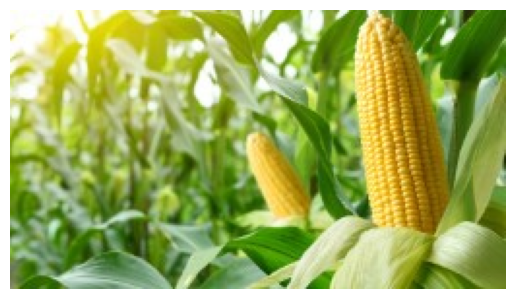

1/1 [==============================] - 0s 258ms/step
Predicted Class Name: Corn___Healthy


In [ ]:
# Example Usage
# image_path = '/content/drive/MyDrive/Project/NewCropsDataset/Corn___Healthy/ch12_0_134.jpg'
# image_path = '/content/drive/MyDrive/Project/NewCropsDataset/Corn___Healthy/Corn_Health (100).jpg'
image_path = '/content/drive/MyDrive/Project/NewCropsDataset/Corn___Healthy/ch1.jpeg'

predicted_class_name = predict_image_class(loaded_model, image_path, loaded_class_indices_int)

# Output the result
print("Predicted Class Name:", predicted_class_name)

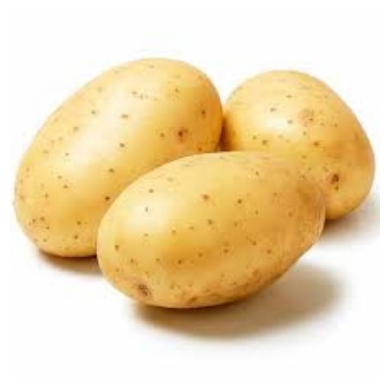

1/1 [==============================] - 0s 68ms/step
Predicted Class Name: Potato___Healthy


In [ ]:
image_path = '/content/drive/MyDrive/Project/NewCropsDataset/Potato___Healthy/ph7.jpeg'

predicted_class_name = predict_image_class(loaded_model, image_path, loaded_class_indices_int)

# Output the result
print("Predicted Class Name:", predicted_class_name)

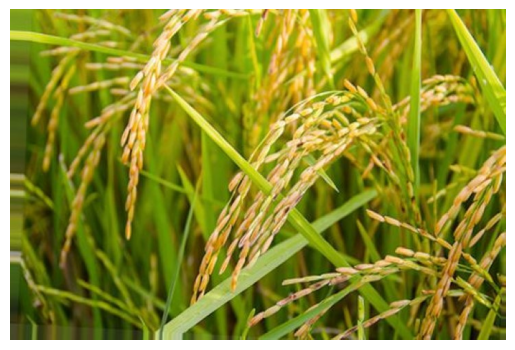

1/1 [==============================] - 0s 74ms/step
Predicted Class Name: Rice___Healthy


In [ ]:
image_path = '/content/drive/MyDrive/Project/NewCropsDataset/Rice___Healthy/rh3_0_6182.jpg'

predicted_class_name = predict_image_class(loaded_model, image_path, loaded_class_indices_int)

# Output the result
print("Predicted Class Name:", predicted_class_name)

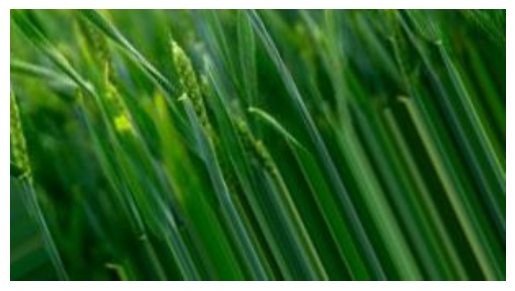

1/1 [==============================] - 0s 55ms/step
Predicted Class Name: Wheat___Healthy


In [ ]:
image_path = '/content/drive/MyDrive/Project/NewCropsDataset/Wheat___Healthy/wh1_0_5897.jpg'

predicted_class_name = predict_image_class(loaded_model, image_path, loaded_class_indices_int)

# Output the result
print("Predicted Class Name:", predicted_class_name)

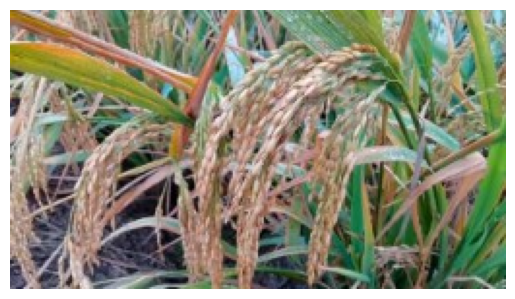

1/1 [==============================] - 0s 84ms/step
Predicted Class Name: Rice___Healthy


In [ ]:
image_path = '/content/drive/MyDrive/Project/Crops Dataset/Rice___Healthy/20201102-Hengnan-Hybrid_rice_Sanyou-1-6.jpg'

predicted_class_name = predict_image_class(loaded_model, image_path, loaded_class_indices_int)

# Output the result
print("Predicted Class Name:", predicted_class_name)

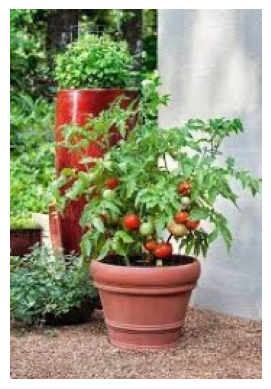

1/1 [==============================] - 0s 118ms/step
Predicted Class Name: Tomato___Healthy


In [ ]:
image_path = '/content/drive/MyDrive/Project/Crops Dataset/Tomato___Healthy/download (10).jpeg'

predicted_class_name = predict_image_class(loaded_model, image_path, loaded_class_indices_int)

# Output the result
print("Predicted Class Name:", predicted_class_name)

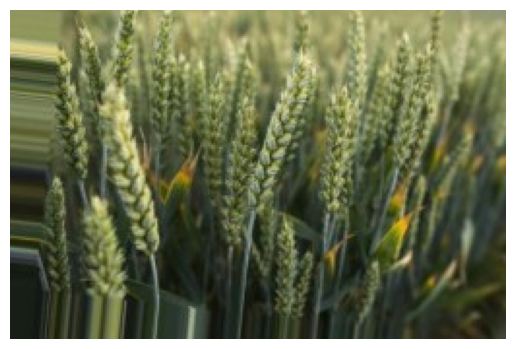

1/1 [==============================] - 0s 104ms/step
Predicted Class Name: Rice__Brown_spot


In [ ]:
image_path = '/content/drive/MyDrive/Project/Crops Dataset/Wheat__Healthy/105027998-close-up-on-young-green-wheat-ears-on-a-beautiful-_0_1435.jpg'

predicted_class_name = predict_image_class(loaded_model, image_path, loaded_class_indices_int)

# Output the result
print("Predicted Class Name:", predicted_class_name)

In [ ]:
import json
import numpy as np
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf

# Load the Keras model
model = tf.keras.models.load_model('/content/drive/MyDrive/Project/Code/CPD_model.h5')

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the converted model to a .tflite file
tflite_model_path = '/content/drive/MyDrive/Project/Code/converted_model.tflite'
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

print(f'TensorFlow Lite model saved to: {tflite_model_path}')


TensorFlow Lite model saved to: /content/drive/MyDrive/Project/Code/converted_model.tflite


In [ ]:

# Load class indices from the JSON file
with open('/content/drive/MyDrive/Project/Code/CPD_class_indices.json', 'r') as json_file:
    loaded_class_indices = json.load(json_file)

# Get the number of classes
num_classes = len(loaded_class_indices)

# Convert class indices to integers (if needed)
loaded_class_indices_int = {int(k): v for k, v in loaded_class_indices.items()}

# Perform one-hot encoding for each loaded class index
one_hot_encoded_labels = {class_index: to_categorical(class_index, num_classes=num_classes) for class_index in loaded_class_indices_int}

# Display the one-hot encoded labels
for class_index, one_hot_label in one_hot_encoded_labels.items():
    print(f"Class Index: {class_index}, One-Hot Encoded Label: {one_hot_label.tolist()}")


Class Index: 0, One-Hot Encoded Label: [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Class Index: 1, One-Hot Encoded Label: [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Class Index: 2, One-Hot Encoded Label: [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Class Index: 3, One-Hot Encoded Label: [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Class Index: 4, One-Hot Encoded Label: [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Class Index: 5, One-Hot Encoded Label: [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Class Index: 6, One-Hot Encoded Label: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

In [ ]:
import numpy as np
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt

# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Turn off axis numbers
    plt.show()
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(interpreter, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    # Get input and output tensors
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    # Set the input tensor
    interpreter.set_tensor(input_details[0]['index'], preprocessed_img)
    # Run inference
    interpreter.invoke()
    # Get the output
    predictions = interpreter.get_tensor(output_details[0]['index'])
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name







In [ ]:
# Load TensorFlow Lite model and allocate tensors
tflite_model_path = '/content/drive/MyDrive/Project/Code/converted_model.tflite'
interpreter = tf.lite.Interpreter(model_path=tflite_model_path)
interpreter.allocate_tensors()

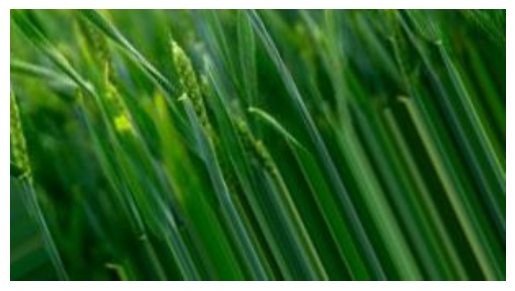

Predicted Class Name: Wheat___Healthy


In [ ]:
# Example Usage
image_path = '/content/drive/MyDrive/Project/NewCropsDataset/Wheat___Healthy/wh1_0_5897.jpg'
predicted_class_name = predict_image_class(interpreter, image_path, loaded_class_indices_int)

# Output the result
print("Predicted Class Name:", predicted_class_name)